In [ ]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

#Loads data from
#https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)


(70000, 784)


In [ ]:
class SimpleDataset(Dataset):

  def __init__(self, X, y):
    super(SimpleDataset, self).__init__()
    self.X = X.to_numpy()
    self.y = y

  def __getitem__(self, index):
    inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
    targets = torch.tensor(int(self.y.iloc[index]), dtype=torch.int64)
    return inputs, targets

  def __len__(self):
    return self.X.shape[0]

dataset = SimpleDataset(X, y)


In [ ]:
import torch
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Returns 784
print("Label of index 0: ", label)
#print(example)



Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


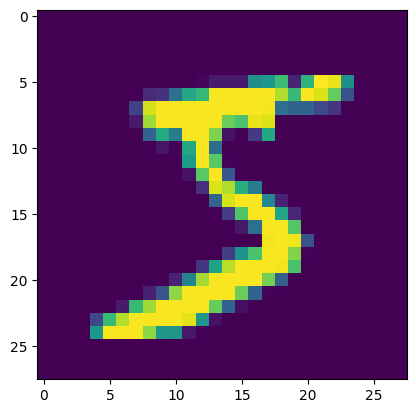

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(example.reshape((28,28)))


In [ ]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset,(train_size, test_size))

print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))


56000 examples for training and 14000 for testing
